# Validación de nuestro modelo usando Cross Validation

# Validación de nuestro modelo usando Cross Validation

La última palabra siempre la tendrán los datos. Todas nuestras intuiciones no tienen relevancia frente a los resultados respaldados por los datos y las matemáticas que aplicamos sobre ellos. Por lo tanto, es esencial ser rigurosos al evaluar los resultados que obtenemos en nuestros modelos. Necesitamos adoptar una mentalidad de prueba constante.

## Importancia de la mentalidad de testeo

La evaluación rigurosa de modelos implica:

- Pruebas constantes a lo largo del proceso.
- Experimentación con diversas formas y conjuntos de datos.
- Variación de configuraciones de parámetros y distribuciones de datos.

## Todos los modelos son malos, algunos son útiles

Es importante recordar que todos los modelos que creamos son simplificaciones de la realidad y nunca serán una representación perfecta de ella. Sin embargo, con suficiente práctica y habilidad para configurar, podemos crear modelos útiles para casos específicos del mundo real.

## Tipos de validación

Imagina que estás aprendiendo a cocinar una nueva receta y quieres asegurarte de que salga deliciosa antes de servirla a tus amigos. Para hacerlo, necesitas probarla tú mismo, pero también deseas tener la opinión de otras personas para obtener una evaluación más precisa.

### Hold-On Validation (Validación Hold-On):

Es como cocinar una receta y probarla tú mismo antes de compartirla. Tomas un pequeño grupo de amigos y les sirves la comida que preparaste. Si a ellos les gusta, es probable que a otras personas también les guste. En el aprendizaje automático, esto se llama "dividir tus datos en un conjunto de entrenamiento y un conjunto de prueba". Entrenas tu modelo con los datos de entrenamiento y luego lo pruebas con los datos de prueba que no ha visto antes. Si el modelo se desempeña bien en los datos de prueba, es una señal de que generaliza bien para nuevos datos.

El método Hold-On implica dividir los datos en conjuntos de entrenamiento y prueba, generalmente utilizando porcentajes fijos como 70% para entrenamiento y 30% para prueba.

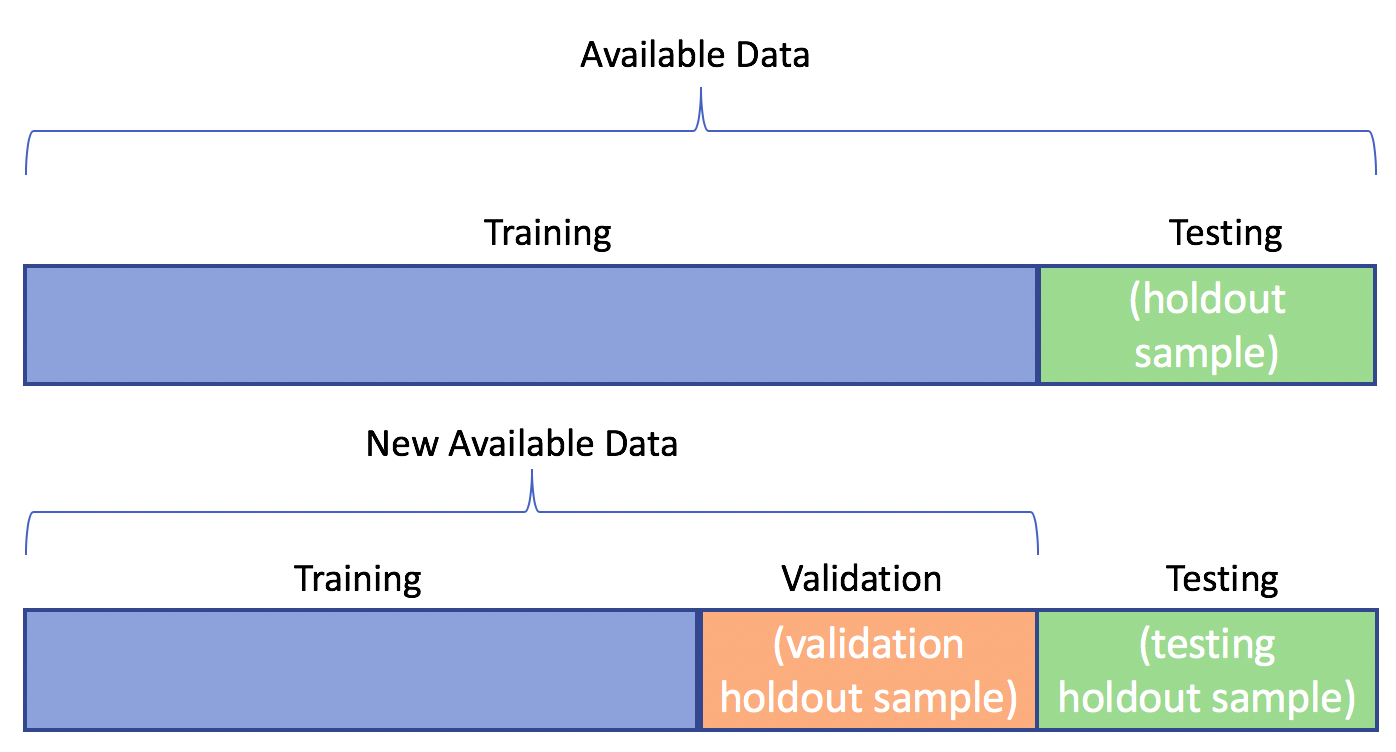

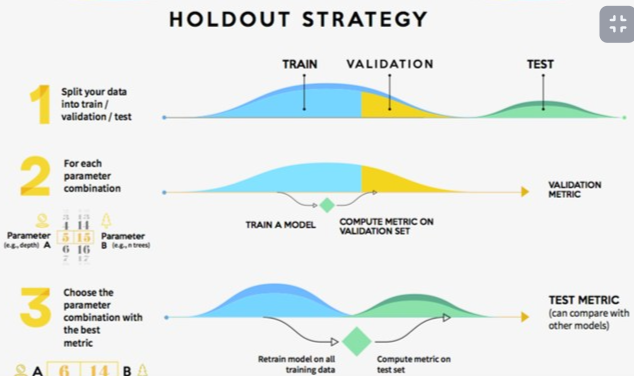

**¿Cuándo utilizar Hold-On?**

- En prototipados rápidos.
- Cuando se tiene poco conocimiento en Machine Learning.
- Si no se dispone de mucho poder computacional.

### K-Folds Cross-Validation (Validación Cruzada K-Folds):

Supongamos que tienes muchos amigos y deseas que la evaluación sea justa y precisa. Divides tu grupo de amigos en 5 subgrupos (k=5). Luego, pruebas tu receta con un subgrupo a la vez y utilizas los otros subgrupos para probar diferentes versiones de tu receta. Al final, obtienes opiniones de todos tus amigos. En aprendizaje automático, esto implica dividir tus datos en k subconjuntos llamados "folds". Luego entrenas tu modelo k veces, cada vez usando k-1 folds para entrenar y 1 fold para probar. Finalmente, calculas el promedio de los resultados para obtener una evaluación generalizada.

La validación cruzada K-Fold implica dividir los datos en k pliegues, realizando k iteraciones. En cada iteración, se utiliza un pliegue diferente como conjunto de prueba y los demás como conjunto de entrenamiento.

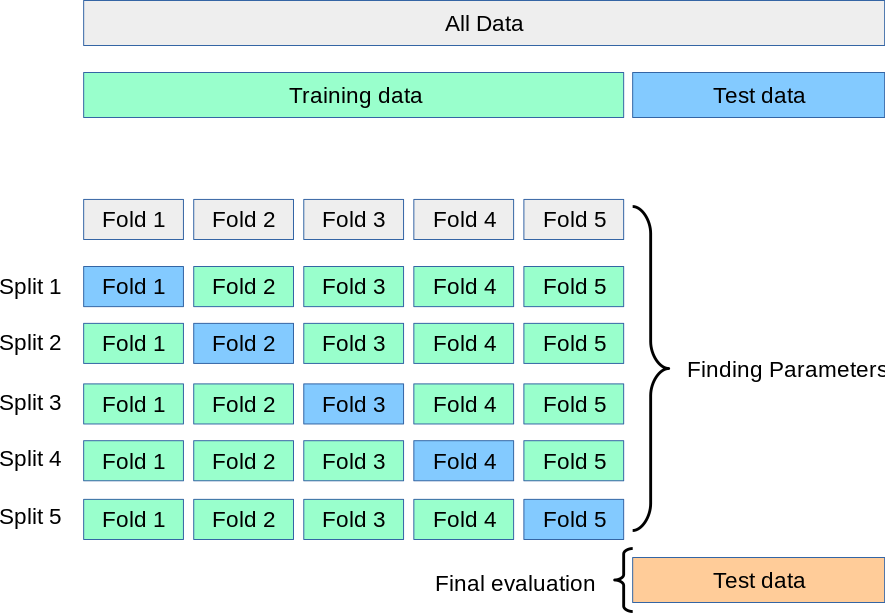

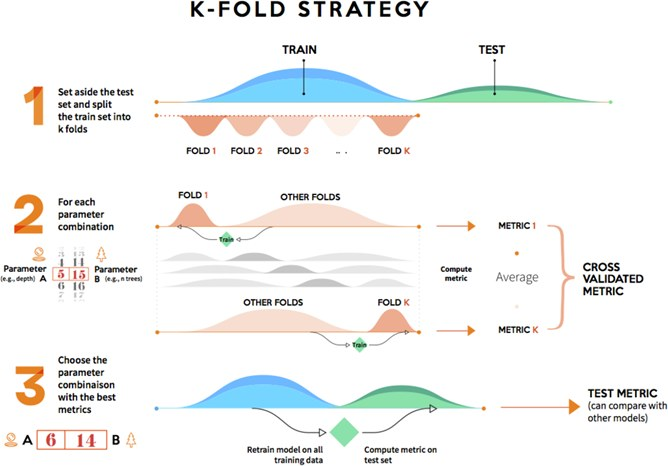

**¿Cuándo utilizar K-Folds?**

- Recomendado en la mayoría de los casos.
- Cuando se cuenta con suficiente capacidad de cómputo.
- Se requiere integración con técnicas de optimización paramétrica.
- Se dispone de más tiempo para las pruebas.

### Leave-One-Out Cross-Validation (Validación Cruzada Leave-One-Out):

Imagina que tienes un grupo de amigos muy pequeño y deseas la opinión más precisa posible. Haces esto al cocinar una porción individual para cada amigo. En aprendizaje automático, esto significa que entrenas tu modelo k veces, donde k es el número total de ejemplos en tus datos. En cada iteración, dejas uno de los ejemplos fuera y entrenas el modelo con los demás. Luego evalúas cómo se comporta el modelo con el ejemplo que dejaste fuera. Esto es útil cuando tienes un conjunto de datos pequeño y quieres aprovechar al máximo cada ejemplo para la evaluación.

El método LOOCV implica realizar k iteraciones, donde k es igual al número total de datos. En cada iteración, se utiliza un dato diferente como conjunto de prueba y los demás como conjunto de entrenamiento.

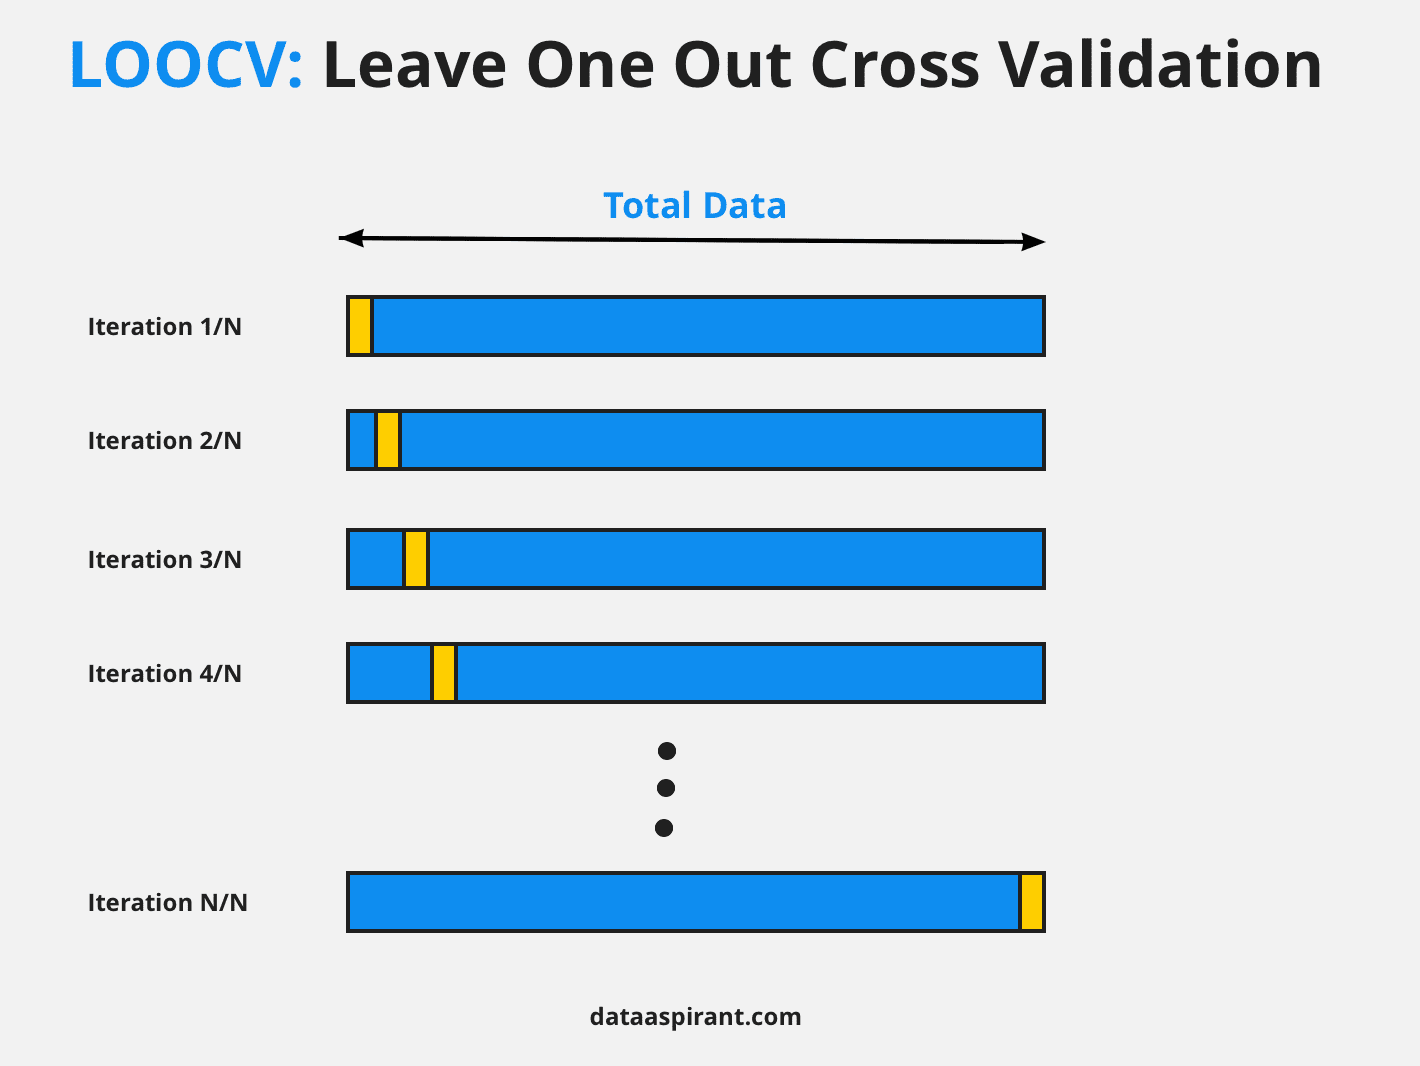

**¿Cuándo utilizar LOOCV?**

- Cuando se tiene gran capacidad de cómputo.
- Si se tienen pocos datos para dividir en conjuntos de entrenamiento y prueba.
- Cuando se busca probar todos los casos posibles (para personas con orientación a la excelencia).

La elección del método de validación dependerá de los recursos disponibles y del nivel de detalle necesario en la evaluación del modelo.


# Implementación de K-Folds Cross Validation

In [78]:
import pandas as pd 
import numpy as np 

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score,KFold

In [79]:
df= pd.read_csv('/home/roy/Scikitlearn/data/felicidad.csv')
df

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [80]:
X = df.drop(columns=['country','rank','score'],axis=1)
y = df[['score']]

In [81]:
# Creamos un modelo DecisionTreeRegressor (regresor basado en árbol de decisión)
model = DecisionTreeRegressor()

# Usamos cross_val_score para realizar validación cruzada del modelo
# X son los datos de características (variables independientes)
# y son los datos de la variable objetivo (variable dependiente)
# cv=5 especifica que se realizará validación cruzada con 5 divisiones (pliegues).
# scoring='neg_mean_squared_error' especifica que se utilizará el error cuadrático medio negativo como métrica para evaluar el modelo.
score = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')

# Calculamos el promedio del valor absoluto de los errores cuadráticos medios negativos
# np.mean(score) calcula el promedio de los errores cuadráticos medios negativos obtenidos en las 5 divisiones.
# np.abs() calcula el valor absoluto.
print(np.abs(np.mean(score)))

0.601878560448044


En este caso se obtuvo un número alrededor de 0.595. Eso significa que, en promedio, las predicciones del modelo estuvieron a una distancia de alrededor de 0.595 de las respuestas correctas. En general, un número más pequeño sería mejor, porque indicaría que el modelo está haciendo predicciones más precisas.

In [82]:
# otra manera de hacerlo 

# n_splits=3 indica que se dividirá el conjunto de datos en 3 pliegues.
# shuffle=True significa que los datos se mezclarán aleatoriamente antes de dividirlos en pliegues.
# random_state=42 asegura la reproducibilidad de los resultados al fijar la semilla del generador de números aleatorios.
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train, test in kf.split(df):
    print(train)
    print(test)

[  0   1   2   3   4   5   6   7   8  10  13  14  16  17  20  21  23  25
  28  32  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52
  53  54  57  58  59  61  62  63  64  67  70  71  72  73  74  77  80  83
  87  88  89  91  92  94  97  98  99 100 101 102 103 104 105 106 107 108
 110 111 112 113 114 115 116 120 121 123 125 127 128 129 130 132 134 135
 136 139 140 143 144 145 146 148 149 150 151 152 154]
[  9  11  12  15  18  19  22  24  26  27  29  30  31  36  42  45  51  55
  56  60  65  66  68  69  75  76  78  79  81  82  84  85  86  90  93  95
  96 109 117 118 119 122 124 126 131 133 137 138 141 142 147 153]
[  1   2   3   6   8   9  11  12  13  14  15  17  18  19  20  21  22  24
  26  27  29  30  31  36  37  38  42  45  48  50  51  52  54  55  56  57
  58  59  60  63  65  66  68  69  71  72  74  75  76  78  79  81  82  83
  84  85  86  87  88  89  90  91  92  93  95  96  99 100 102 103 106 107
 109 112 115 116 117 118 119 120 121 122 124 126 128 129 130 131 132 133
 135

# Optimización de hiperparámetros | Hyperparameter Optimization

Después de familiarizarnos con el concepto de Cross Validation, podemos aplicar este mismo principio para automatizar la selección y optimización de nuestros modelos de Machine Learning.

## El Problema de Optimización de Hiperparámetros

Una vez que encontramos un modelo de aprendizaje que parece funcionar, a menudo necesitamos optimizar los parámetros del modelo para obtener los mejores resultados posibles. Sin embargo, esto puede volverse complicado debido a la cantidad de parámetros y ajustes posibles.

- Es fácil perderse entre los conceptos de tantos parámetros.
- Medir la sensibilidad de los parámetros manualmente puede ser difícil.
- Es costoso en términos de tiempo humano y recursos computacionales.

Scikit Learn nos ofrece enfoques para automatizar el proceso de optimización de hiperparámetros. 

**Existen tres enfoques principales:**

## Optimización Manual

1. Escoger el modelo que queremos ajustar.
2. Buscar en la documentación de Scikit-Learn.
3. Identificar los parámetros y ajustes requeridos.
4. Probar combinaciones iterando a través de listas.

## Optimización por Grilla de Parámetros (GridSearchCV)

Este enfoque es organizado, exhaustivo y sistemático. Probamos todos los parámetros especificados en una "grilla" con sus respectivos rangos de valores.

Pasos:

1. Definir métricas a optimizar.
2. Identificar valores posibles para los parámetros.
3. Crear un diccionario de parámetros.
4. Usar Cross Validation.
5. Entrenar el modelo.

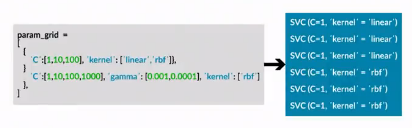

Este enfoque prueba todas las combinaciones de parámetros en grupos definidos.

## Optimización por Búsqueda Aleatorizada (RandomizedSearchCV)

Si tenemos limitaciones de tiempo o queremos explorar optimizaciones aleatorias, este método es útil. Similar al enfoque anterior, pero busca parámetros de manera aleatoria y Scikit Learn selecciona las mejores combinaciones.

En este método, definimos rangos de valores para los parámetros y el sistema realiza varias iteraciones para encontrar la mejor combinación.

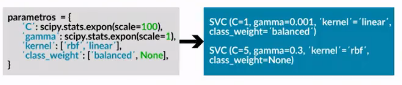

## GridSearchCV vs RandomizedSearchCV

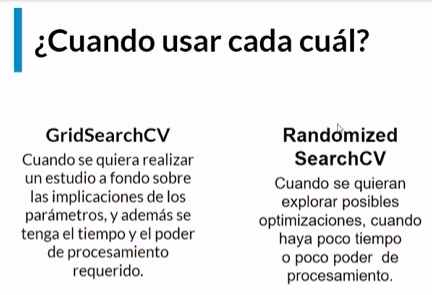

**GridSearchCV:**

- Para un estudio exhaustivo de los parámetros.
- Cuando hay tiempo disponible.
- Con suficiente capacidad de procesamiento.

**RandomizedSearchCV:**

- Para explorar optimizaciones posibles.
- Cuando el tiempo es limitado.
- Con recursos computacionales limitados.

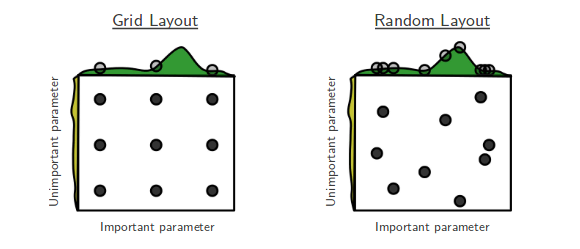

La elección entre GridSearchCV y RandomizedSearchCV depende de los recursos disponibles y del grado de optimización deseado.


# Implementación de Randomized


In [86]:
df

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [84]:
# Importar la clase RandomForestRegressor desde la biblioteca sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

# Importar la clase RandomizedSearchCV desde la biblioteca sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

# Creamos un modelo RandomForestRegressor (regresor basado en bosques aleatorios)
reg = RandomForestRegressor()

# Definimos un diccionario de parámetros a explorar en la búsqueda
parametros = {
    'n_estimators': range(4, 16),  # Diferentes números de estimadores en el bosque (árboles)
    'criterion': ['squared_error', 'absolute_error'],  # Diferentes criterios para medir la calidad de la división en los nodos (squared_error para MSE y absolute_error para MAE)
    'max_depth': range(2, 11)  # Diferentes profundidades máximas para los árboles
}

# Creamos un objeto RandomizedSearchCV para buscar los mejores hiperparámetros
# reg es el estimador (modelo) que se va a ajustar
# parametros es el diccionario de parámetros a explorar
# n_iter=10 especifica cuántas combinaciones aleatorias de hiperparámetros se probarán
# cv=3 especifica la validación cruzada con 3 divisiones
# scoring='neg_mean_absolute_error' utiliza el error absoluto medio negativo como métrica para evaluar el rendimiento
rand_est = RandomizedSearchCV(reg, parametros, n_iter=10, cv=3, scoring='neg_mean_absolute_error').fit(X, y)



/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [115]:
# Imprimimos el mejor estimador encontrado durante la búsqueda aleatoria
print("Mejor estimador:")
print(rand_est.best_estimator_)

# Imprimimos los mejores parámetros encontrados durante la búsqueda aleatoria
print("Mejores parámetros:")
print(rand_est.best_params_)

# Utilizamos el mejor estimador para hacer una predicción sobre una muestra específica que ya conocemos (en este caso, la muestra en la fila 0 de los datos X)
prediction = rand_est.predict(X.loc[[0]])

# Imprimimos la predicción realizada
print("Predicción para la muestra en la fila 0:")
print(prediction)
print('valor real', df.iloc[0, 2])



Mejor estimador:
RandomForestRegressor(max_depth=8, n_estimators=13)
Mejores parámetros:
{'n_estimators': 13, 'max_depth': 8, 'criterion': 'squared_error'}
Predicción para la muestra en la fila 0:
[7.53038476]
valor real 7.537000179
